In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import datetime

Orange_CO_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Orange/CO/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Orange/CO/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Orange/CO/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Orange/CO/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Orange/CO/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Orange/CO/2020.csv'])
, ignore_index=True)

In [3]:
import datetime
# the data is collected across multiple sites daily
# TODO: Consider the geographical distribution of the sites and their proximity to each other.
# this function calculates the daily average across all sites - Spatial aggregation
def calculate_daily_average(dataset, date_column, pollutant):
  # Ensure the date column is in datetime format
  dataset[date_column] = pd.to_datetime(dataset[date_column])
  dataset[date_column] = dataset[date_column].dt.date
  daily_avg = dataset.groupby(date_column)[pollutant].mean().reset_index()

  return daily_avg

In [4]:
Orange_CO_full = calculate_daily_average(Orange_CO_full, 'Date', 'Daily Max 8-hour CO Concentration')

In [5]:
# Some of the dataset contain missing dates
# this method finds those dates
def find_missing_dates(data, date_column):
  # Ensure the date column is in datetime format
  data[date_column] = pd.to_datetime(data[date_column])
  # Create a full range od dates
  min_date = data[date_column].min()
  max_date = data[date_column].max()
  full_dates = pd.date_range(start=min_date, end=max_date, freq='D')

  # Find missing dates
  missing_dates = full_dates.difference(data[date_column])

  return missing_dates

In [6]:
missing_dates = find_missing_dates(Orange_CO_full, 'Date')

In [7]:
Orange_NO2_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Orange/NO2/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Orange/NO2/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Orange/NO2/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Orange/NO2/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Orange/NO2/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Orange/NO2/2020.csv'])
, ignore_index=True)

In [8]:
Orange_NO2_full = calculate_daily_average(Orange_NO2_full, 'Date', 'Daily Max 1-hour NO2 Concentration')
missing_dates = find_missing_dates(Orange_NO2_full, 'Date')
print(missing_dates)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [9]:
Orange_Ozone_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Orange/Ozone/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Orange/Ozone/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Orange/Ozone/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Orange/Ozone/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Orange/Ozone/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Orange/Ozone/2020.csv'])
, ignore_index=True)

In [10]:
Orange_Ozone_full = calculate_daily_average(Orange_Ozone_full, 'Date', 'Daily Max 8-hour Ozone Concentration')
missing_dates = find_missing_dates(Orange_Ozone_full, 'Date')
print(missing_dates)

DatetimeIndex(['2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31',
               '2019-12-31'],
              dtype='datetime64[ns]', freq=None)


In [11]:
def process_data(data,  date_column, missing_dates):
  # Convert 'Date' column to datetime if it is not already
  data[date_column] = pd.to_datetime(data[date_column])

  # Set 'Date' as the index
  data.set_index(date_column, inplace=True)

  # Add the missing dates to the DataFrame with NaN values
  data = data.reindex(data.index.union(missing_dates))

  #Reset index to make 'Date' a regular column again
  data.reset_index(inplace=True)

  data.fillna(0, inplace=True)

  return data


In [12]:
Orange_Ozone_full = process_data(Orange_Ozone_full, 'Date', missing_dates)

In [13]:
# manually add 2020-12-31
new_entry = {'index': pd.to_datetime('2020-12-31'), 'Daily Max 8-hour Ozone Concentration': 0.0326668}
Orange_Ozone_full.loc[len(Orange_Ozone_full)] = new_entry

In [14]:
Orange_Ozone_full.reset_index(drop=True, inplace=True)

In [15]:
Orange_PM2_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Orange/PM2.5/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Orange/PM2.5/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Orange/PM2.5/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Orange/PM2.5/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Orange/PM2.5/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Orange/PM2.5/2020.csv'])
, ignore_index=True)

In [16]:
Orange_PM2_full = calculate_daily_average(Orange_PM2_full, 'Date', 'Daily Mean PM2.5 Concentration')
missing_dates = find_missing_dates(Orange_PM2_full, 'Date')
print(missing_dates)

DatetimeIndex(['2016-02-19'], dtype='datetime64[ns]', freq=None)


In [17]:
Orange_PM2_full = process_data(Orange_PM2_full, 'Date', missing_dates)

In [18]:
Orange_PM10_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Orange/PM10/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Orange/PM10/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Orange/PM10/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Orange/PM10/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Orange/PM10/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Orange/PM10/2020.csv'])
, ignore_index=True)

In [19]:
Orange_PM10_full = calculate_daily_average(Orange_PM10_full, 'Date', 'Daily Mean PM10 Concentration')
missing_dates = find_missing_dates(Orange_PM10_full, 'Date')
print(missing_dates)

DatetimeIndex(['2015-11-21', '2016-02-09', '2016-02-10', '2016-02-11',
               '2016-05-19', '2016-05-20', '2016-05-21', '2016-05-22',
               '2016-05-23', '2016-07-13',
               ...
               '2019-11-20', '2019-11-21', '2020-03-05', '2020-03-06',
               '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13',
               '2020-04-14', '2020-06-03'],
              dtype='datetime64[ns]', length=120, freq=None)


In [20]:
Orange_PM10_full = process_data(Orange_PM10_full, 'Date', missing_dates)

In [21]:
Orange_SO2_full = pd.concat(map(pd.read_csv, ['gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Orange/SO2/2015.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Orange/SO2/2016.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Orange/SO2/2017.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Orange/SO2/2018.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Orange/SO2/2019.csv',
                                     'gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/Orange/SO2/2020.csv'])
, ignore_index=True)

In [22]:
Orange_SO2_full = calculate_daily_average(Orange_SO2_full, 'Date', 'Daily Max 1-hour SO2 Concentration')
missing_dates = find_missing_dates(Orange_SO2_full, 'Date')
print(missing_dates)

DatetimeIndex(['2015-02-10', '2015-02-11', '2015-02-12', '2015-02-18',
               '2015-02-19', '2015-02-20', '2015-02-24', '2015-02-27',
               '2015-03-03', '2015-03-25',
               ...
               '2020-03-03', '2020-11-16', '2020-11-17', '2020-11-18',
               '2020-11-19', '2020-11-20', '2020-11-21', '2020-11-22',
               '2020-11-23', '2020-11-24'],
              dtype='datetime64[ns]', length=268, freq=None)


In [23]:
Orange_SO2_full = process_data(Orange_SO2_full, 'Date', missing_dates)

In [24]:
Orange_CO_full.rename(columns = {'index':'Date'}, inplace = True)
Orange_NO2_full.rename(columns = {'index':'Date'}, inplace = True)
Orange_Ozone_full.rename(columns = {'index':'Date'}, inplace = True)
Orange_PM2_full.rename(columns = {'index':'Date'}, inplace = True)
Orange_PM10_full.rename(columns = {'index':'Date'}, inplace = True)
Orange_SO2_full.rename(columns = {'index':'Date'}, inplace = True)

In [25]:
from functools import reduce
combine = reduce(lambda x,y: pd.merge(x,y, on='Date', how='outer'), [Orange_CO_full,Orange_NO2_full,Orange_Ozone_full,Orange_PM2_full,Orange_PM10_full,Orange_SO2_full])

In [26]:
combine.head()

,Date,Daily Max 8-hour CO Concentration,Daily Max 1-hour NO2 Concentration,Daily Max 8-hour Ozone Concentration,Daily Mean PM2.5 Concentration,Daily Mean PM10 Concentration,Daily Max 1-hour SO2 Concentration
0,2015-01-01,0.80,35.325,0.034667,26.900000,43.0,0.5
1,2015-01-02,0.88,38.450,0.028000,27.050000,41.0,1.5
2,2015-01-03,0.86,37.100,0.035333,22.433333,38.0,0.5
3,2015-01-04,0.96,42.550,0.027000,33.200000,44.0,0.4
4,2015-01-05,1.44,48.275,0.021667,18.650000,37.0,1.4


In [27]:
combine.rename(columns = {'Daily Max 8-hour CO Concentration':'CO', 'Daily Max 1-hour NO2 Concentration': 'NO2',
                          'Daily Max 8-hour Ozone Concentration': 'Ozone', 'Daily Mean PM2.5 Concentration': 'PM2.5',
                          'Daily Mean PM10 Concentration': 'PM10', 'Daily Max 1-hour SO2 Concentration': 'SO2' }, inplace = True)

In [28]:
combine

,Date,CO,NO2,Ozone,PM2.5,PM10,SO2
0,2015-01-01,0.800000,35.325000,0.034667,26.900000,43.000000,0.5
1,2015-01-02,0.880000,38.450000,0.028000,27.050000,41.000000,1.5
2,2015-01-03,0.860000,37.100000,0.035333,22.433333,38.000000,0.5
3,2015-01-04,0.960000,42.550000,0.027000,33.200000,44.000000,0.4
4,2015-01-05,1.440000,48.275000,0.021667,18.650000,37.000000,1.4
...,...,...,...,...,...,...,...
2187,2020-12-27,0.300000,13.433333,0.032333,6.750000,14.000000,2.2
2188,2020-12-28,0.233333,19.066667,0.033333,2.950000,3.000000,2.3
2189,2020-12-29,0.666667,31.666667,0.033333,7.275000,11.333333,2.5
2190,2020-12-30,0.766667,35.733333,0.026667,10.800000,20.000000,2.5


In [29]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

In [30]:
# descriptive statistics of the data
print(combine.describe())

                CO          NO2        Ozone        PM2.5         PM10  \
count  2192.000000  2192.000000  2192.000000  2192.000000  2192.000000   
mean      0.538347    26.358014     0.044075    11.141577    21.789918   
std       0.275147    12.396029     0.011774     6.640702    14.802271   
min       0.133333     4.200000     0.000000     0.000000     0.000000   
25%       0.333333    15.866667     0.037000     7.150000    12.625000   
50%       0.450000    24.612500     0.044000    10.050000    21.000000   
75%       0.700000    35.137500     0.050750    13.350000    28.541667   
max       2.033333    77.566667     0.107667    59.860000   295.000000   

               SO2  
count  2192.000000  
mean      0.649681  
std       0.747611  
min      -0.500000  
25%       0.100000  
50%       0.400000  
75%       0.900000  
max       7.800000  


In [31]:
# show intensity of each pollutant over time
fig = go.Figure()

for pollutant in ['CO', 'NO2', 'Ozone', 'PM2.5', 'PM10', 'SO2']:
  fig.add_trace(go.Scatter(x=combine['Date'], y=combine[pollutant], mode='lines',
                           name=pollutant))

fig.update_layout(title='Time Series Analysis of Air Pollutants in Los Angeles',
                  xaxis_title='Date', yaxis_title='Concentration (ug/m3)')

fig.show()

In [32]:
#Calculate Air Quality Index
aqi_breakpoints = [
    (0, 12.0, 50), (12.1, 35.4, 100), (35.5, 55.4, 150),
    (55.5, 150.4, 200), (150.5, 250.4, 300), (250.5, 350.4, 400),
    (350.5, 500.4, 500)
]

def calculate_aqi(pollutant_name, concentration):
  for low, high, aqi in aqi_breakpoints:
    if low <= concentration <= high:
      return aqi
  return None

def calculate_overall_aqi(row):
  aqi_values = []
  pollutants = ['CO', 'NO2', 'Ozone', 'PM2.5', 'PM10', 'SO2']
  for pollutant in pollutants:
    aqi = calculate_aqi(pollutant, row[pollutant])
    if aqi is not None:
      aqi_values.append(aqi)
  return max(aqi_values)


# Calculate AQI for each row
combine['AQI'] = combine.apply(calculate_overall_aqi, axis=1)

# Define AQI categories
aqi_categories = [
    (0, 50, 'Good'), (51, 100, 'Moderate'), (101, 150, 'Unhealthy for Sensitive Groups'),
    (151, 200, 'Unhealthy'), (201, 300, 'Very Unhealthy'), (301, 500, 'Hazardous')
]

def categorize_aqi(aqi_value):
  for low, high, category in aqi_categories:
    if low <= aqi_value <= high:
      return category
  return None

In [33]:
#Categorize AQI
combine['AQI Category'] = combine['AQI'].apply(categorize_aqi)
print(combine.head())

        Date    CO     NO2     Ozone      PM2.5  PM10  SO2  AQI  \
0 2015-01-01  0.80  35.325  0.034667  26.900000  43.0  0.5  150   
1 2015-01-02  0.88  38.450  0.028000  27.050000  41.0  1.5  150   
2 2015-01-03  0.86  37.100  0.035333  22.433333  38.0  0.5  150   
3 2015-01-04  0.96  42.550  0.027000  33.200000  44.0  0.4  150   
4 2015-01-05  1.44  48.275  0.021667  18.650000  37.0  1.4  150   

                     AQI Category  
0  Unhealthy for Sensitive Groups  
1  Unhealthy for Sensitive Groups  
2  Unhealthy for Sensitive Groups  
3  Unhealthy for Sensitive Groups  
4  Unhealthy for Sensitive Groups  


In [34]:
asthma_data = pd.read_csv('gdrive/MyDrive/ColabNotebooks/air-prediction/air-quality-California/asthma-hospitalization-rates-by-county.csv', encoding="ISO-8859-1")

asthma_data['NUMBER OF HOSPITALIZATIONS'] = asthma_data['NUMBER OF HOSPITALIZATIONS'].str.replace(',', '').astype(float)

print(asthma_data.head())

       COUNTY  YEAR            STRATA STRATA NAME AGE GROUP  \
0  California  2015  Total population    All ages  All ages   
1     Alameda  2015  Total population    All ages  All ages   
2      Alpine  2015  Total population    All ages  All ages   
3      Amador  2015  Total population    All ages  All ages   
4       Butte  2015  Total population    All ages  All ages   

   NUMBER OF HOSPITALIZATIONS  AGE-ADJUSTED HOSPITALIZATION RATE COMMENT  
0                     27262.0                                7.0     NaN  
1                      1435.0                                9.3     NaN  
2                         0.0                                0.0     NaN  
3                        28.0                                7.5     NaN  
4                       143.0                                6.7     NaN  


In [35]:
combine['COUNTY'] = 'Orange'

In [36]:
combine['Date'] = pd.to_datetime(combine['Date'])
combine_yearly = combine.groupby(['COUNTY',combine['Date'].dt.year]).mean().reset_index()
combine_yearly.rename(columns = {'Date':'YEAR'}, inplace = True)
merged_data = pd.merge(asthma_data, combine_yearly, how='inner', left_on=['COUNTY', 'YEAR'], right_on=['COUNTY', 'YEAR'])
# Perform correlation analysis
correlation_matrix = merged_data[['NUMBER OF HOSPITALIZATIONS', 'CO', 'NO2', 'Ozone', 'PM2.5', 'SO2', 'AQI']].corr()

<ipython-input-36-28fbee1b0bae>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [37]:
merged_data.head(5)

,COUNTY,YEAR,STRATA,STRATA NAME,AGE GROUP,NUMBER OF HOSPITALIZATIONS,AGE-ADJUSTED HOSPITALIZATION RATE,COMMENT,CO,NO2,Ozone,PM2.5,PM10,SO2,AQI
0,Orange,2015,Total population,All ages,All ages,1713.0,5.5,NaN,0.556466,28.27379,0.042786,11.970685,24.257534,0.462192,116.712329
1,Orange,2015,Child vs. adult,017 years,017 years,562.0,7.8,NaN,0.556466,28.27379,0.042786,11.970685,24.257534,0.462192,116.712329
2,Orange,2015,Child vs. adult,18+ years,18+ years,1151.0,4.7,NaN,0.556466,28.27379,0.042786,11.970685,24.257534,0.462192,116.712329
3,Orange,2015,Age groups,04 years,04 years,313.0,15.5,NaN,0.556466,28.27379,0.042786,11.970685,24.257534,0.462192,116.712329
4,Orange,2015,Age groups,517 years,517 years,249.0,4.9,NaN,0.556466,28.27379,0.042786,11.970685,24.257534,0.462192,116.712329


In [38]:
print(correlation_matrix)

                            NUMBER OF HOSPITALIZATIONS        CO       NO2  \
NUMBER OF HOSPITALIZATIONS                    1.000000  0.146303  0.335120   
CO                                            0.146303  1.000000  0.783427   
NO2                                           0.335120  0.783427  1.000000   
Ozone                                        -0.331532 -0.137663 -0.527907   
PM2.5                                         0.065356  0.779609  0.599621   
SO2                                          -0.270365 -0.577899 -0.632788   
AQI                                           0.109018  0.910427  0.740040   

                               Ozone     PM2.5       SO2       AQI  
NUMBER OF HOSPITALIZATIONS -0.331532  0.065356 -0.270365  0.109018  
CO                         -0.137663  0.779609 -0.577899  0.910427  
NO2                        -0.527907  0.599621 -0.632788  0.740040  
Ozone                       1.000000  0.067157  0.471268 -0.027494  
PM2.5                       0.

In [ ]:
# AQI over time
fig = px.bar(combine, x="Date", y="AQI",
             title="AQI of Los Angeles from 2015 - 2020")
fig.update_xaxes(title='Date')
fig.update_yaxes(title="AQI")
fig.show()

In [ ]:
# AQI Category distribution
fig = px.histogram(combine, x="Date",
                   color="AQI Category",
                   title="AQI Category Distribution Over Time")
fig.update_xaxes(title="Date")
fig.update_yaxes(title="Count")
fig.show()

In [ ]:
# Distribution of Pollutants in the air quality of Los Angeles
pollutants = ['CO', 'NO2', 'Ozone', 'PM2.5', 'PM10', 'SO2']
pollutant_colors = px.colors.qualitative.Plotly

# Calculate the sum of pollutant concentrations
total_concentrations = combine[pollutants].sum()

# Create a DataFrame for the concentrations
concentration_data = pd.DataFrame({
    "Pollutant": pollutants,
    "Concentration": total_concentrations
})

# Create a donut plot for pollutant concentrations
fig = px.pie(concentration_data, names="Pollutant", values="Concentration",
             title="Pollutant Concentrations in Los Angeles",
             hole=0.4, color_discrete_sequence=pollutant_colors)

# Update layout for the donut plot
fig.update_traces(textinfo="percent+label")
fig.update_layout(legend_title="Pollutant")

# Show the donut plot
fig.show()

In [ ]:
# Correlation Between Pollutants
correlation_matrix = combine[pollutants].corr()
fig = px.imshow(correlation_matrix, x=pollutants, y=pollutants, title="Correlation Between Pollutants")
fig.show()

In [39]:
# Correlation Between Pollutants and Number of Hospitalization
parameters = ['CO', 'NO2', 'Ozone', 'PM2.5', 'SO2', 'AQI', 'NUMBER OF HOSPITALIZATIONS']
correlation_matrix = merged_data[parameters].corr()
fig = px.imshow(correlation_matrix, x=parameters, y=parameters, title="Correlation Between Pollutants and No. of Hospitalization")
fig.show()

In [ ]:
combine['Day_of_Week'] = combine['Date'].dt.day_name()
average_aqi_by_day = combine.groupby('Day_of_Week')['AQI'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Create a line plot for daily trends in AQI
fig = px.bar(average_aqi_by_day, x=average_aqi_by_day.index, y="AQI",
              title="Average AQI by Day Trends in San Diego")
fig.update_xaxes(title="Day of the Week")
fig.update_yaxes(title="Average AQI")
fig.show()

In [ ]:
combine['Year'] = combine['Date'].dt.year
average_aqi_by_year = combine.groupby('Year')['AQI'].mean()

# Create a line plot for daily trends in AQI
fig = px.bar(average_aqi_by_year, x=average_aqi_by_year.index, y="AQI",
              title="Average AQI by Year Trends in San Diego")
fig.update_xaxes(title="Year")
fig.update_yaxes(title="Average AQI")
fig.show()

In [ ]:
import calendar
combine['Month'] = combine['Date'].dt.month.apply(lambda x: calendar.month_abbr[x])
average_aqi_by_month = combine.groupby('Month')['AQI'].mean()
# Create a line plot for daily trends in AQI
fig = px.bar(average_aqi_by_month, x=average_aqi_by_month.index, y="AQI",
              title="Average AQI by Month Trends in Los Angeles")
fig.update_xaxes(title="Months")
fig.update_yaxes(title="Average AQI")
fig.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

#Convert 'Date' to datetime and set it as the index
combine['Date'] = pd.to_datetime(combine['Date'])
combine.set_index('Date', inplace=True)

In [ ]:
# Feature Scaling
scaler = MinMaxScaler()
combine['AQI_scaled'] = scaler.fit_transform(combine['AQI'].values.reshape(-1,1))

In [ ]:
# Define sequence length and number of future time steps to predict
sequence_length = 30
#num_future_steps = 3 # Adjust according to needs

# function to create sequences for LSTM
def create_sequences(data, seq_length):
  X = []
  y = []
  for i in range(len(data) - seq_length):
    X.append(data[i:i+seq_length])
    y.append(data[i+seq_length])
  return np.array(X), np.array(y)

In [ ]:
 #Create sequences with multiple future time steps
X, y = create_sequences(combine['AQI_scaled'], sequence_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape data for LSTM input
#X_train = X_train.reshape((X_train.shape[0], sequence_length, len(target_variable)))
#X_test = X_test.reshape((X_test.shape[0], sequence_length, len(target_variable )))

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1)) # Output layer with units equal to (num_future_steps * num_target_variables)

model.compile(optimizer='adam', loss='mse')

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
44/44 [==============================] - 4s 39ms/step - loss: 0.0092 - val_loss: 0.0043
Epoch 2/50
44/44 [==============================] - 1s 27ms/step - loss: 0.0048 - val_loss: 0.0039
Epoch 3/50
44/44 [==============================] - 1s 29ms/step - loss: 0.0047 - val_loss: 0.0040
Epoch 4/50
44/44 [==============================] - 1s 21ms/step - loss: 0.0046 - val_loss: 0.0038
Epoch 5/50
44/44 [==============================] - 1s 17ms/step - loss: 0.0045 - val_loss: 0.0038
Epoch 6/50
44/44 [==============================] - 1s 17ms/step - loss: 0.0045 - val_loss: 0.0038
Epoch 7/50
44/44 [==============================] - 1s 18ms/step - loss: 0.0045 - val_loss: 0.0038
Epoch 8/50
44/44 [==============================] - 1s 18ms/step - loss: 0.0046 - val_loss: 0.0038
Epoch 9/50
44/44 [==============================] - 1s 18ms/step - loss: 0.0045 - val_loss: 0.0038
Epoch 10/50
44/44 [==============================] - 1s 17ms/step - loss: 0.0045 - val_loss: 0.0038
Epoch 11/

In [ ]:
# make predictions
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

14/14 [==============================] - 0s 6ms/step


In [ ]:
# evaluate the performance of the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(combine['AQI'][train_size+sequence_length:], predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 795.3597562625065


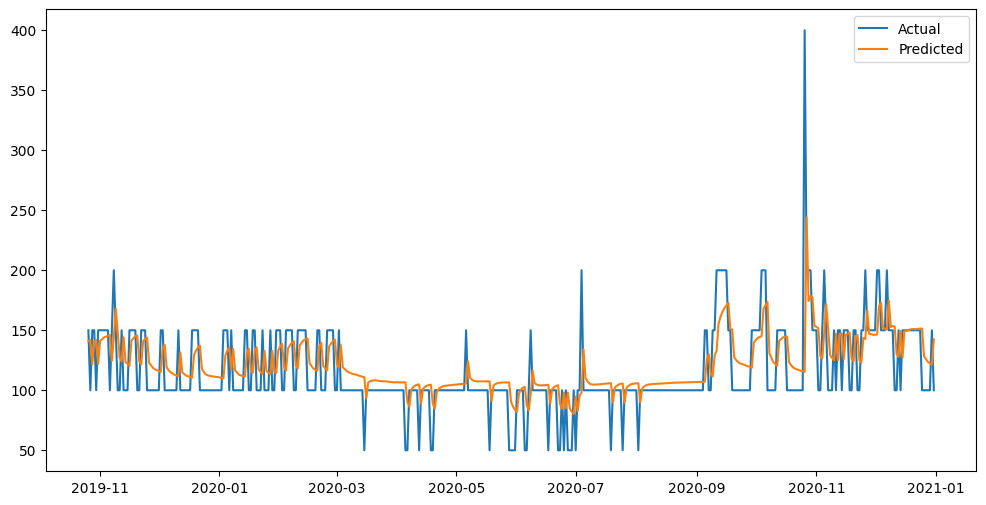

In [ ]:
# Visualize results
plt.figure(figsize=(12,6))
plt.plot(combine.index[train_size+sequence_length:], combine['AQI'][train_size+sequence_length:], label='Actual')
plt.plot(combine.index[train_size+sequence_length:], predictions, label='Predicted')
plt.legend()

In [ ]:
# Pollutant CO
combine['CO_scaled'] = scaler.fit_transform(combine['CO'].values.reshape(-1,1))

In [ ]:
#Create sequences with multiple future time steps
X_CO, y_CO = create_sequences(combine['CO_scaled'], sequence_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_CO_train, X_CO_test = X_CO[:train_size], X_CO[train_size:]
y_CO_train, y_CO_test = y_CO[:train_size], y_CO[train_size:]

In [ ]:
# Build the LSTM model
model2 = Sequential()
model2.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model2.add(Dense(units=1)) # Output layer with units equal to (num_future_steps * num_target_variables)

model2.compile(optimizer='adam', loss='mse')

In [ ]:
X_CO_train = X_CO_train.reshape((X_CO_train.shape[0], X_CO_train.shape[1], 1))
# Train the model
model2.fit(X_CO_train, y_CO_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
44/44 [==============================] - 6s 42ms/step - loss: 0.0374 - val_loss: 0.0112
Epoch 2/20
44/44 [==============================] - 1s 18ms/step - loss: 0.0113 - val_loss: 0.0073
Epoch 3/20
44/44 [==============================] - 1s 18ms/step - loss: 0.0100 - val_loss: 0.0067
Epoch 4/20
44/44 [==============================] - 1s 18ms/step - loss: 0.0090 - val_loss: 0.0065
Epoch 5/20
44/44 [==============================] - 1s 17ms/step - loss: 0.0091 - val_loss: 0.0065
Epoch 6/20
44/44 [==============================] - 1s 17ms/step - loss: 0.0086 - val_loss: 0.0062
Epoch 7/20
44/44 [==============================] - 1s 19ms/step - loss: 0.0087 - val_loss: 0.0061
Epoch 8/20
44/44 [==============================] - 1s 28ms/step - loss: 0.0084 - val_loss: 0.0060
Epoch 9/20
44/44 [==============================] - 1s 28ms/step - loss: 0.0084 - val_loss: 0.0059
Epoch 10/20
44/44 [==============================] - 1s 27ms/step - loss: 0.0080 - val_loss: 0.0059
Epoch 11/

In [ ]:
# make predictions
X_CO_test = X_CO_test.reshape((X_CO_test.shape[0], X_CO_test.shape[1], 1))
predictionsCO = model2.predict(X_CO_test)
predictionsCO = scaler.inverse_transform(predictionsCO)

14/14 [==============================] - 1s 11ms/step


In [ ]:
# evaluate the performance of the model
mseCO = mean_squared_error(combine['CO'][train_size+sequence_length:], predictionsCO)
print(f'Mean Squared Error: {mseCO}')

Mean Squared Error: 0.026719294542432263


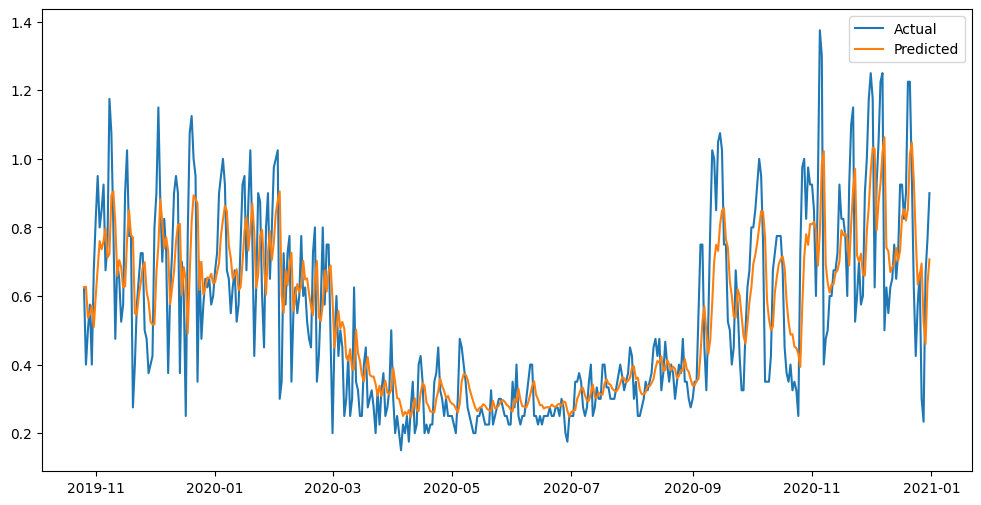

In [ ]:
# Visualize results
plt.figure(figsize=(12,6))
plt.plot(combine.index[train_size+sequence_length:], combine['CO'][train_size+sequence_length:], label='Actual')
plt.plot(combine.index[train_size+sequence_length:], predictionsCO, label='Predicted')
plt.legend()

In [ ]:
model2.save('Orange-CO.keras')

In [ ]:
model.save('Orange-AQI.keras')

In [ ]:
# Pollutant PM2.5
combine['PM2.5_scaled'] = scaler.fit_transform(combine['PM2.5'].values.reshape(-1,1))

In [ ]:
#Create sequences with multiple future time steps
X_PM, y_PM = create_sequences(combine['PM2.5_scaled'], sequence_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_PM_train, X_PM_test = X_PM[:train_size], X_PM[train_size:]
y_PM_train, y_PM_test = y_PM[:train_size], y_PM[train_size:]

In [ ]:
# Build the LSTM model
model3 = Sequential()
model3.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model3.add(Dense(units=1)) # Output layer with units equal to (num_future_steps * num_target_variables)

model3.compile(optimizer='adam', loss='mse')

In [ ]:
X_PM_train = X_PM_train.reshape((X_PM_train.shape[0], X_PM_train.shape[1], 1))
# Train the model
model3.fit(X_PM_train, y_PM_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
44/44 [==============================] - 6s 51ms/step - loss: 0.0144 - val_loss: 0.0072
Epoch 2/20
44/44 [==============================] - 1s 29ms/step - loss: 0.0091 - val_loss: 0.0076
Epoch 3/20
44/44 [==============================] - 1s 18ms/step - loss: 0.0088 - val_loss: 0.0068
Epoch 4/20
44/44 [==============================] - 1s 18ms/step - loss: 0.0085 - val_loss: 0.0066
Epoch 5/20
44/44 [==============================] - 1s 20ms/step - loss: 0.0084 - val_loss: 0.0064
Epoch 6/20
44/44 [==============================] - 1s 18ms/step - loss: 0.0082 - val_loss: 0.0070
Epoch 7/20
44/44 [==============================] - 1s 19ms/step - loss: 0.0078 - val_loss: 0.0063
Epoch 8/20
44/44 [==============================] - 1s 18ms/step - loss: 0.0076 - val_loss: 0.0061
Epoch 9/20
44/44 [==============================] - 1s 20ms/step - loss: 0.0076 - val_loss: 0.0061
Epoch 10/20
44/44 [==============================] - 1s 18ms/step - loss: 0.0074 - val_loss: 0.0059
Epoch 11/

In [ ]:
# make predictions
X_PM_test = X_PM_test.reshape((X_PM_test.shape[0], X_PM_test.shape[1], 1))
predictionsPM = model3.predict(X_PM_test)
predictionsPM = scaler.inverse_transform(predictionsPM)

14/14 [==============================] - 1s 14ms/step


In [ ]:
# evaluate the performance of the model
msePM = mean_squared_error(combine['PM2.5'][train_size+sequence_length:], predictionsPM)
print(f'Mean Squared Error: {msePM}')

Mean Squared Error: 28.11214906233927


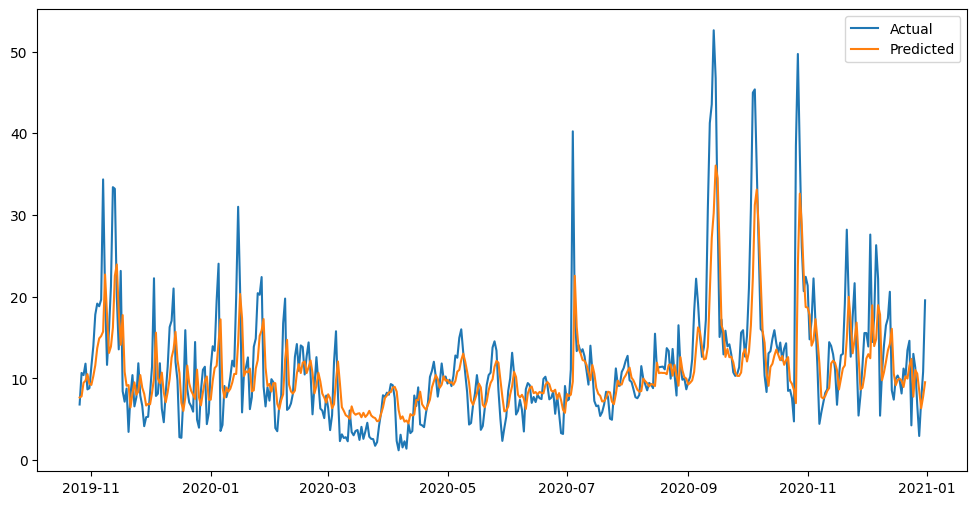

In [ ]:
# Visualize results
plt.figure(figsize=(12,6))
plt.plot(combine.index[train_size+sequence_length:], combine['PM2.5'][train_size+sequence_length:], label='Actual')
plt.plot(combine.index[train_size+sequence_length:], predictionsPM, label='Predicted')
plt.legend()

In [ ]:
model3.save('Orange-PM2.5.keras')